# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')
%matplotlib inline

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

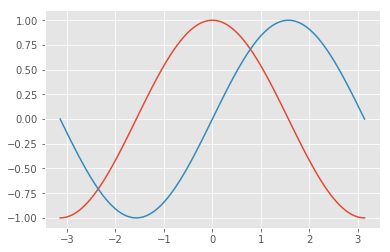

In [2]:
X = np.linspace(-np.pi, np.pi, 100)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C)
plt.plot(X,S)

plt.show()

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


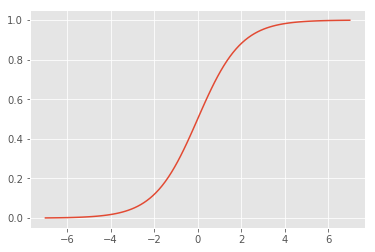

In [3]:
n = 100

X = np.linspace(-7, 7, n)
Y = np.e ** X / (1 + np.e ** X)

plt.plot(X, Y)
plt.show()

### Scatter plots

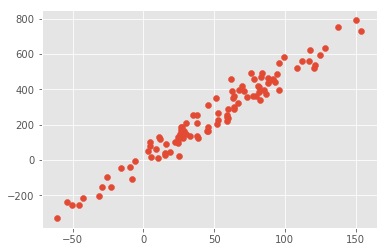

In [4]:
true_theta_0 = 2
true_theta_1 = 5

X = (np.random.randn(100) + 1) * 50
jitter = 50 * np.random.randn(100)
Y = true_theta_0 + true_theta_1 * X + jitter

plt.scatter (X, Y)
plt.show()

### Bar plots

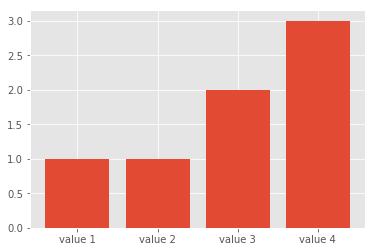

In [5]:
X=[1,1,2,3]
Y=["value 1","value 2","value 3","value 4"]

plt.bar(range(len(X)), X)
plt.xticks(np.arange(len(X)), Y)
plt.show()

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

#### Exercise

Write a function following the recommended signature for custom plotting functions.

In [6]:
def scatter_plot(ax, data1, data2, param_dict={}):
    
        out = ax.scatter(data1, data2, **param_dict)
        return out

In [7]:
def generate_points(theta_0, theta_1, scale=50, n=100):
    
    true_theta_0 = 2
    true_theta_1 = 5

    X = (np.random.randn(n) + 1) * scale
    jitter = scale * np.random.randn(n)
    Y = true_theta_0 + true_theta_1 * X + jitter
    
    return X, Y

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

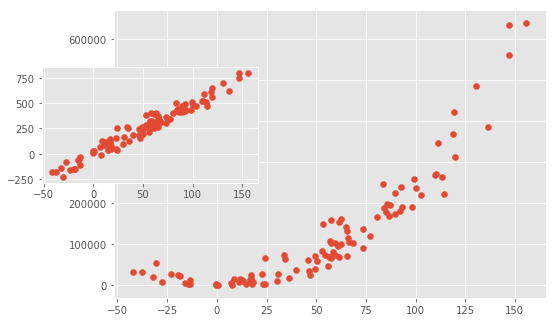

In [8]:
X, Y = generate_points(20, 0.2)

figure = plt.figure(figsize=(10,8))
axes = figure.add_axes([0.2,0.4,0.6,0.5])
scatter_plot(axes, X, Y ** 2)

axes2 = figure.add_axes([0.1,0.6,0.3,0.2])
scatter_plot(axes2, X, Y)

plt.show()

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

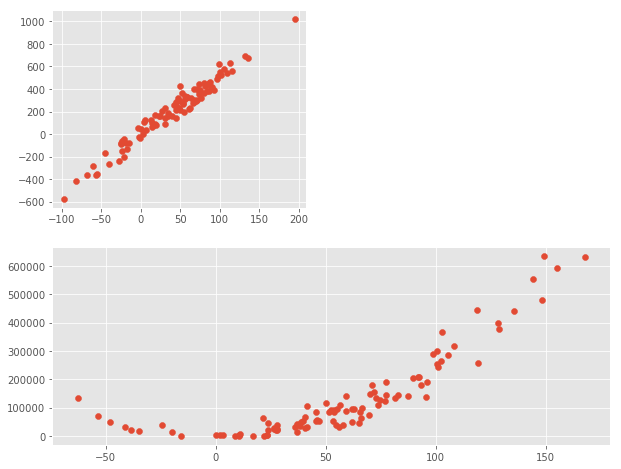

In [9]:
X1, Y1 = generate_points(50, 1.5)
X2, Y2 = generate_points(20, 0.2)
Y2_square = Y2 ** 2

figure = plt.figure(figsize=(10,8))

subplot_1 = figure.add_subplot(2,2,1)
scatter_plot(subplot_1, X1, Y1)

subplot_2 = figure.add_subplot(2,1,2)
scatter_plot(subplot_2, X2, Y2_square)

plt.show()

### `figure.subplots()`

<class 'numpy.ndarray'> (2, 2)


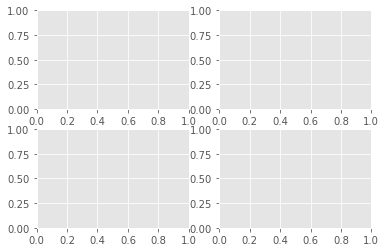

In [10]:
figure, axes = plt.subplots(2,2)
print(type(axes), axes.shape)

/home/dani/anaconda3/envs/bbva-data-fundamentals/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


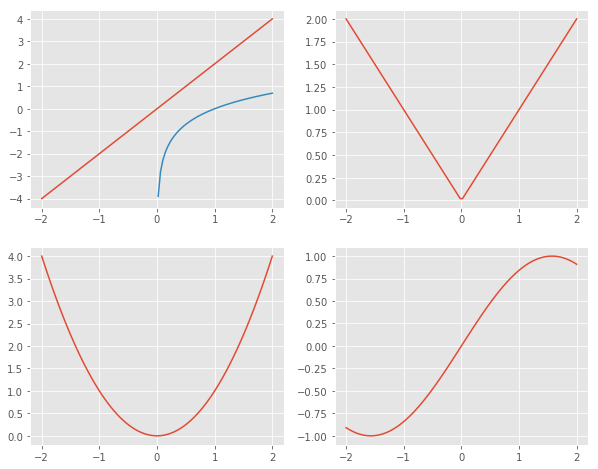

In [11]:
X = np.linspace(-2, 2, 100)

figure, axes_array = plt.subplots(2,2)
figure.set_size_inches(10,8)

# Linear and Log
axes_array[0,0].plot(X, 2*X)
axes_array[0,0].plot(X, np.log(X))

# Abs
axes_array[0,1].plot(X, np.abs(X))

# Square
axes_array[1,0].plot(X, X ** 2)

# Sin
axes_array[1,1].plot(X, np.sin(X))

plt.show()

### Sharing axis

/home/dani/anaconda3/envs/bbva-data-fundamentals/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


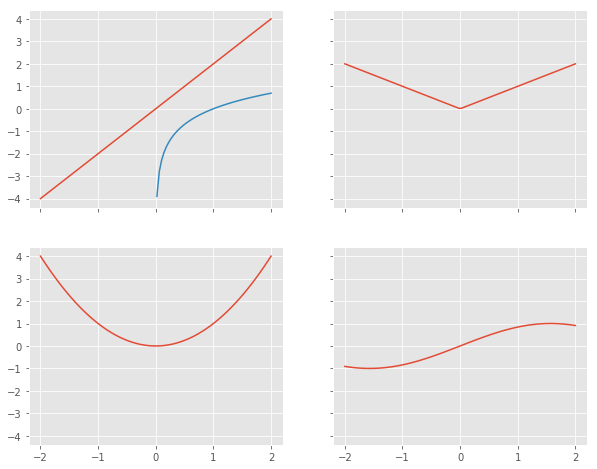

In [12]:
X = np.linspace(-2, 2, 100)

figure, axes_array = plt.subplots(2,2, sharex=True, sharey=True)
figure.set_size_inches(10,8)

# Linear and Log
axes_array[0,0].plot(X, 2*X)
axes_array[0,0].plot(X, np.log(X))

# Abs
axes_array[0,1].plot(X, np.abs(X))

# Square
axes_array[1,0].plot(X, X ** 2)

# Sin
axes_array[1,1].plot(X, np.sin(X))

plt.show()

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

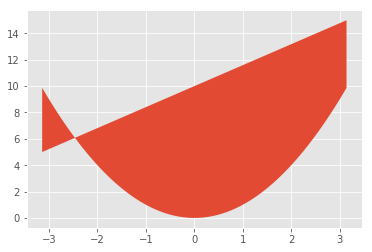

In [13]:
n=256
X = np.linspace(-np.pi,np.pi,n)

Y1 = np.linspace(5,15,n)
Y2 = X ** 2

plt.fill_between(X, Y1, X ** 2)

plt.show()

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

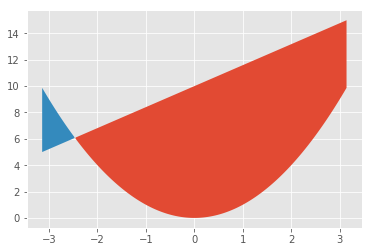

In [14]:
n=256
X = np.linspace(-np.pi,np.pi,n)

Y1 = np.linspace(5,15,n)
Y2 = X ** 2

plt.fill_between(X, Y1, X ** 2, where=Y1 > Y2)
plt.fill_between(X, Y1, X ** 2, where=Y1 < Y2)

plt.show()

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



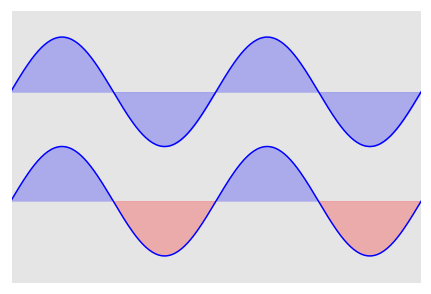

In [15]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.axes([0.025,0.025,0.95,0.95])

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y+1, color='blue', alpha=.25)

plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y-1, (Y-1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y-1, (Y-1) < -1, color='red',  alpha=.25)

plt.xlim(-np.pi,np.pi), plt.xticks([])
plt.ylim(-2.5,2.5), plt.yticks([])

plt.show()

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

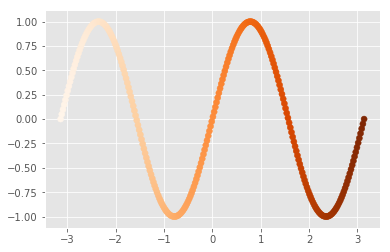

In [16]:
from matplotlib import cm

cmap = cm.get_cmap('Oranges')
plt.scatter(X,Y, c=X, cmap=cmap)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

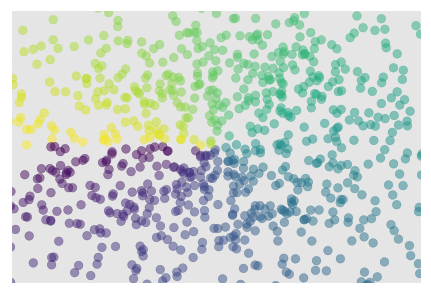

In [17]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

plt.axes([0.025,0.025,0.95,0.95])
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])

plt.show()

### Markers and linestyles

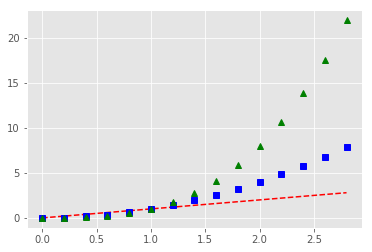

In [18]:
figure, axes = plt.subplots(1,1)


X = np.arange(0, 3, .2)
Y1 = X
Y2 = X ** 2
Y3 = X ** 3

axes.plot(X, Y1, 'r--')
axes.plot(X, Y2, 'bs')
axes.plot(X, Y3, 'g^')

plt.show()

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

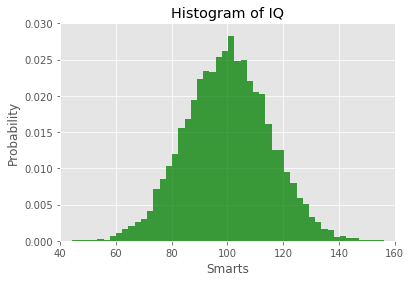

In [19]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.



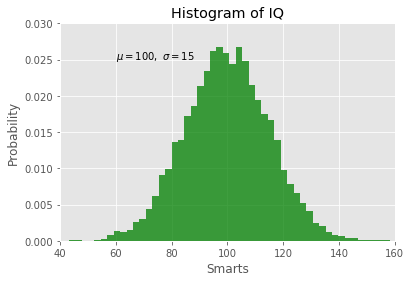

In [20]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Legends

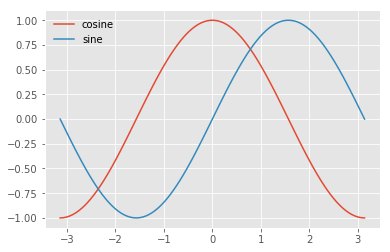

In [21]:
X = np.linspace(-np.pi, np.pi, 100)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C, label='cosine')
plt.plot(X,S, label='sine')

plt.legend(loc='best', frameon=False)

plt.show()

## Ticks, tick labels, limits

### Ticks

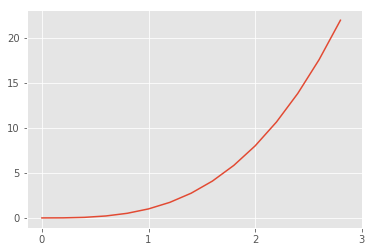

In [22]:
figure, axes = plt.subplots(1,1)

X = np.arange(0, 3, .2)
Y = X ** 3

axes.plot(X, Y)
axes.set_xticks(range(4))

plt.show()

### Tick labels

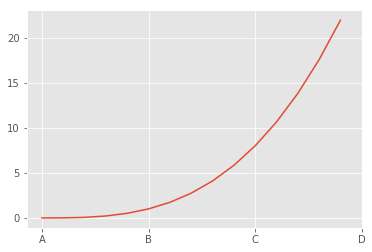

In [23]:
figure, axes = plt.subplots(1,1)

X = np.arange(0, 3, .2)
Y = X ** 3

axes.plot(X, Y)
axes.set_xticks(range(4))
axes.set_xticklabels(list('ABCD'))

plt.show()

### Limits

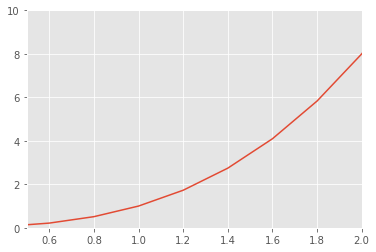

In [24]:
plt.plot(X, Y)

axes = plt.gca()
axes.set_xlim((0.5,2))
axes.set_ylim((0,10))

plt.show()

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

In [25]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/houses.csv', index_col=0)
df.columns = [column.strip() for column in df.columns]
df.head()

,the local selling prices in hundreds of dollars,the number of bathrooms,the area of the site in thousands of square feet,the size of the living space (1000 square feet),number of garages,number of rooms,the number of bedrooms,the age in years,construction type,architecture type,number of fire places,selling price
index,,,,,,,,,,,,
1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


In [26]:
short_column_names = ['local_prices', 'bathrooms', 'site_area', 
                      'living_area', 'garages', 'rooms', 
                      'bedrooms', 'age', 'construction_type', 
                      'architecture', 'fireplaces', 'price']

df.columns = short_column_names

## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

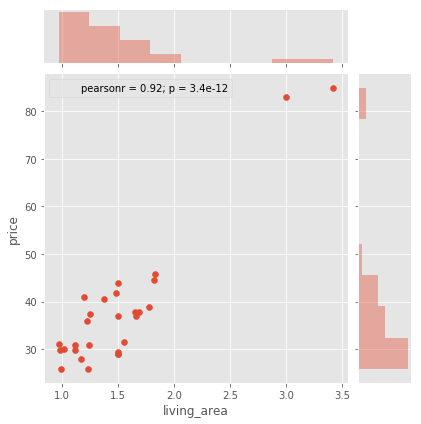

In [27]:

sns.jointplot(data=df, x='living_area', y='price');

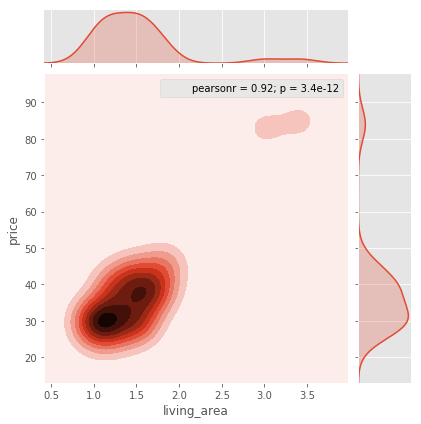

In [28]:
sns.jointplot(data=df, x='living_area', y='price', kind='kde');

### Histogram

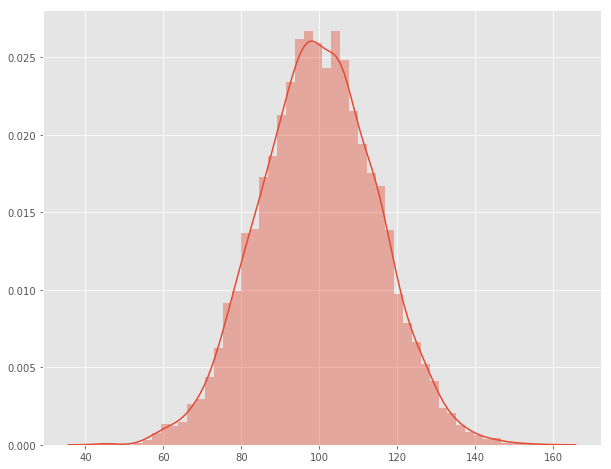

In [29]:
plt.figure(figsize=(10,8))
X = np.random.normal(size=200)
sns.distplot(x);

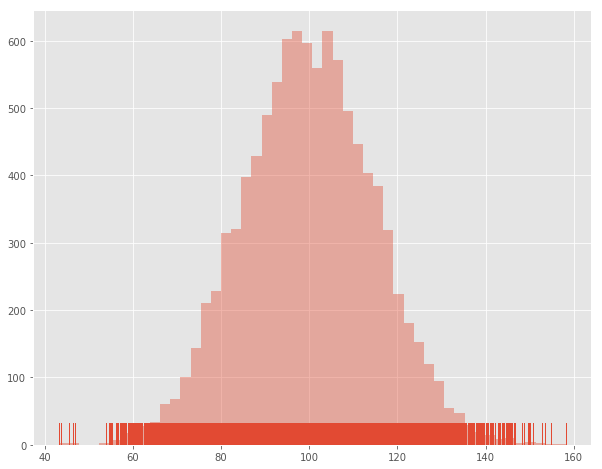

In [30]:
plt.figure(figsize=(10,8))
X = np.random.normal(size=200)
sns.distplot(x, kde=False, rug=True);

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

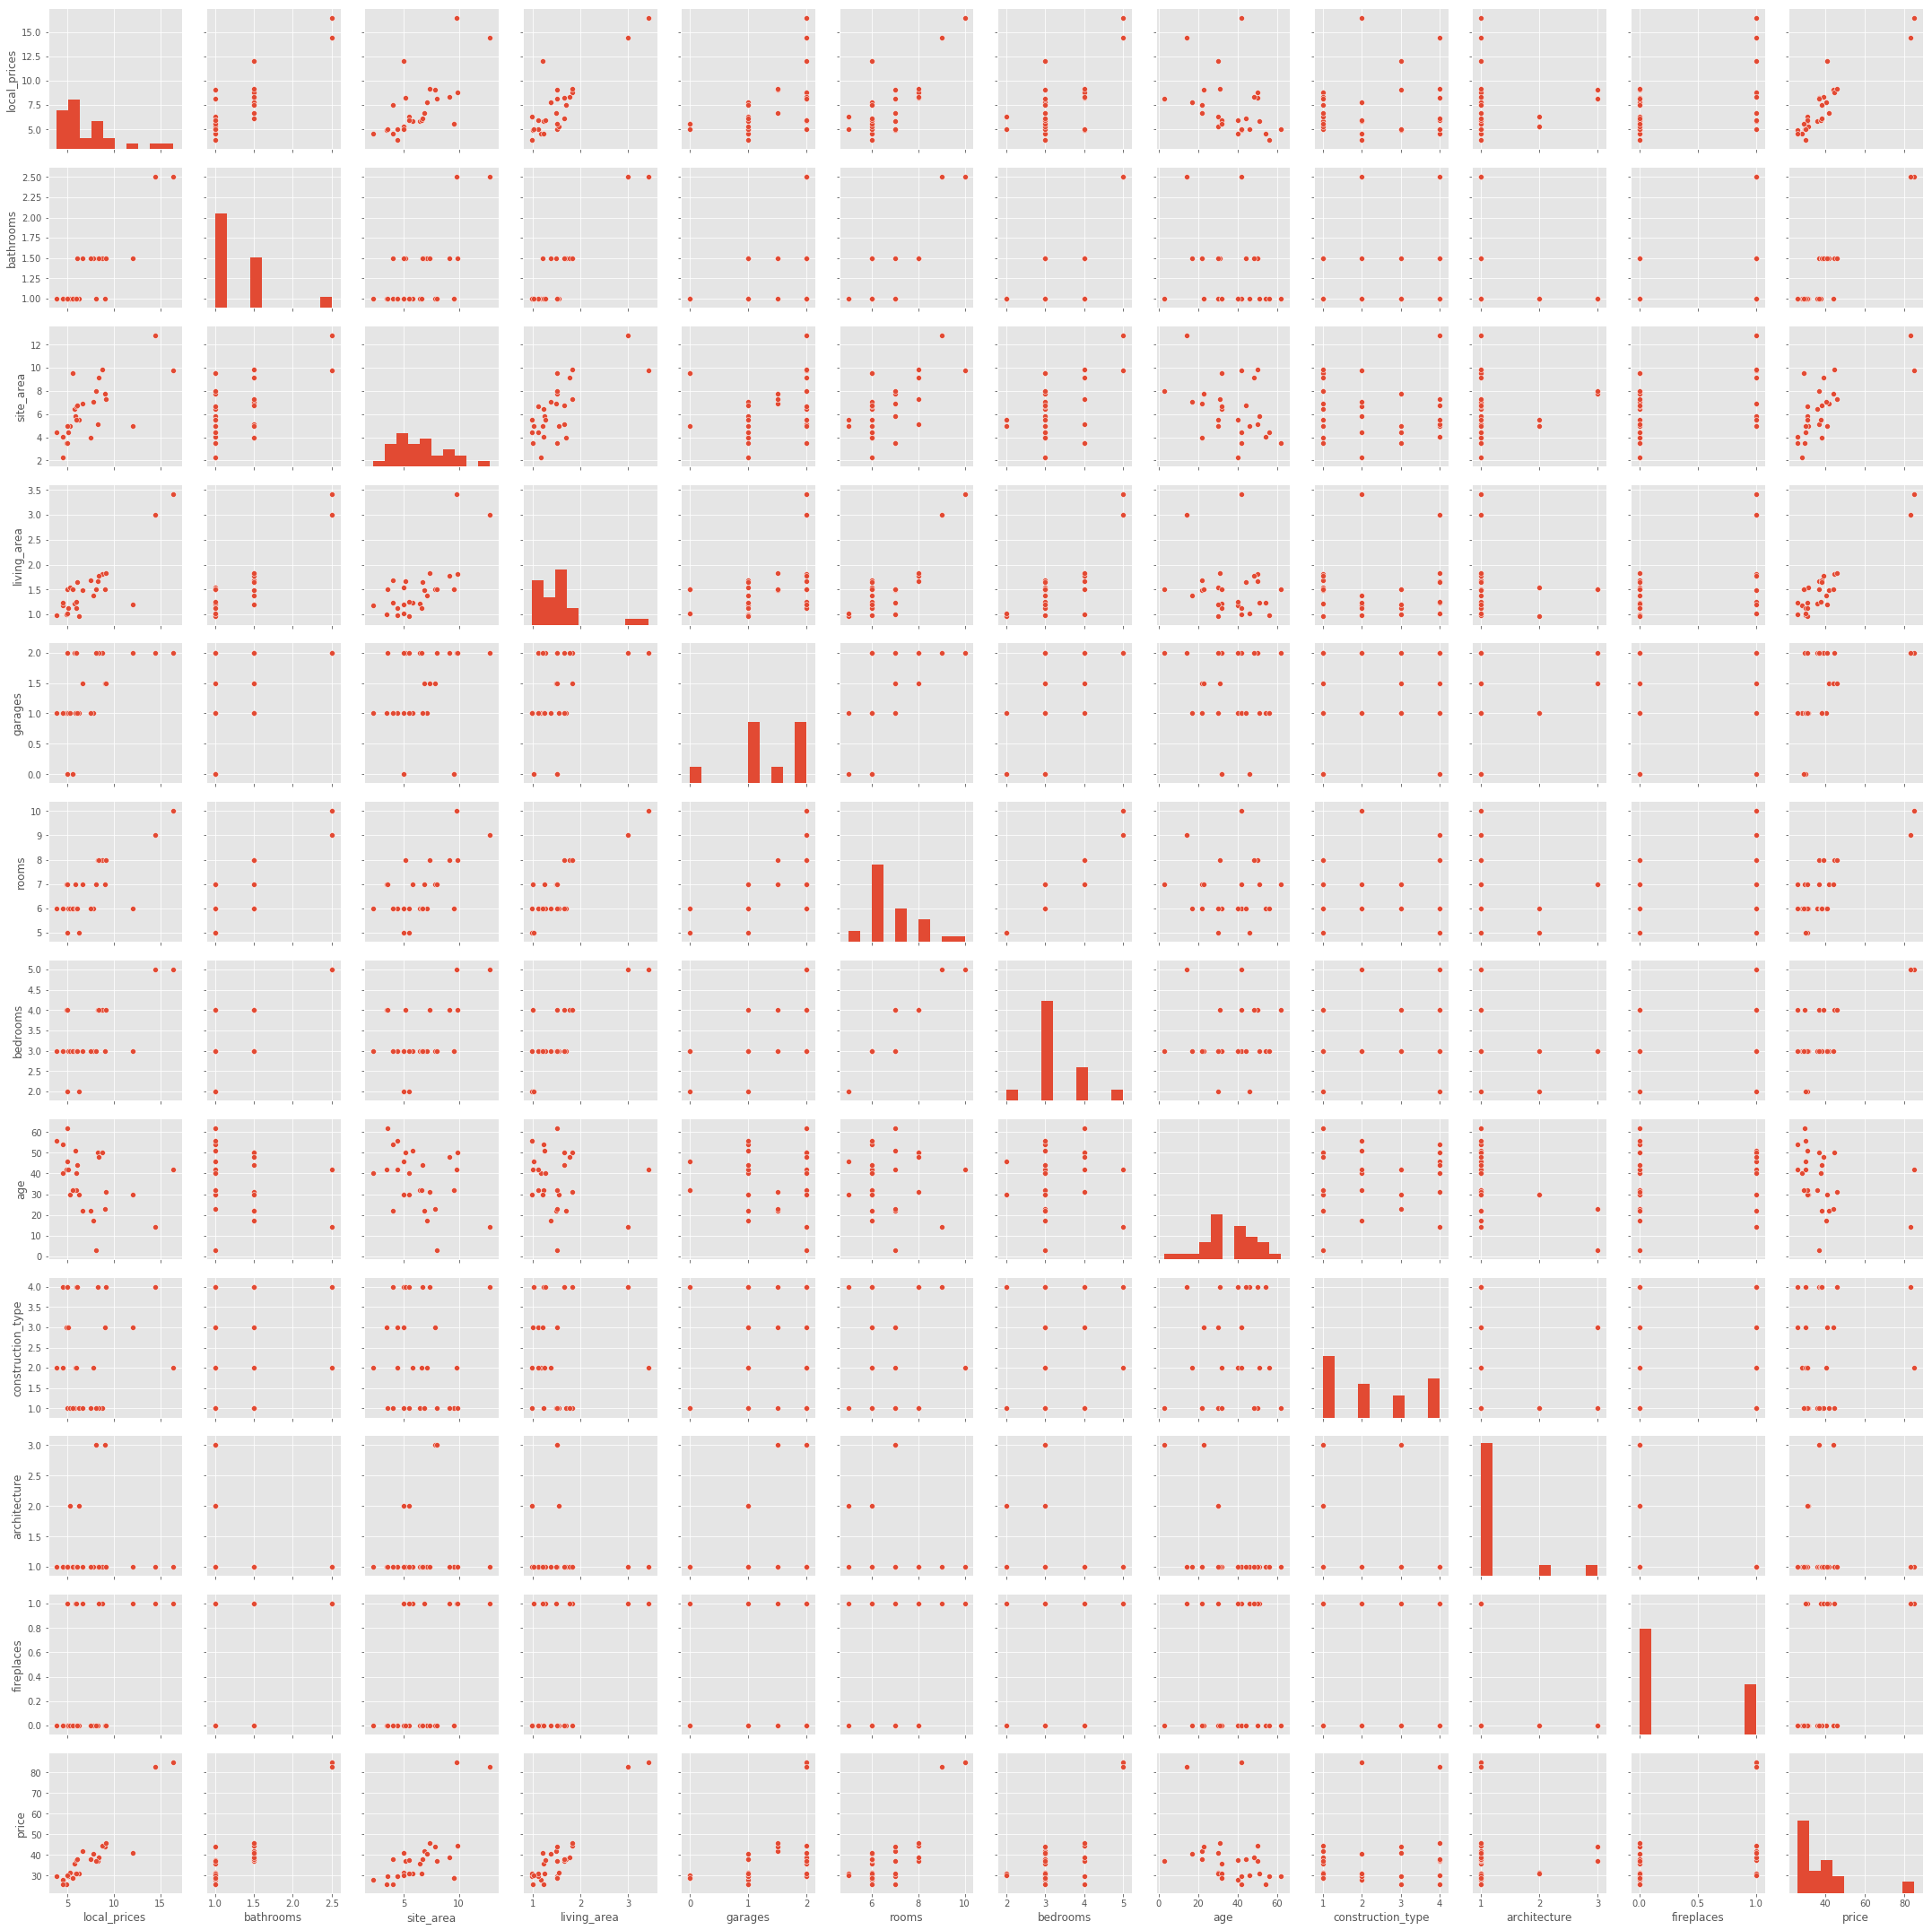

In [31]:
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

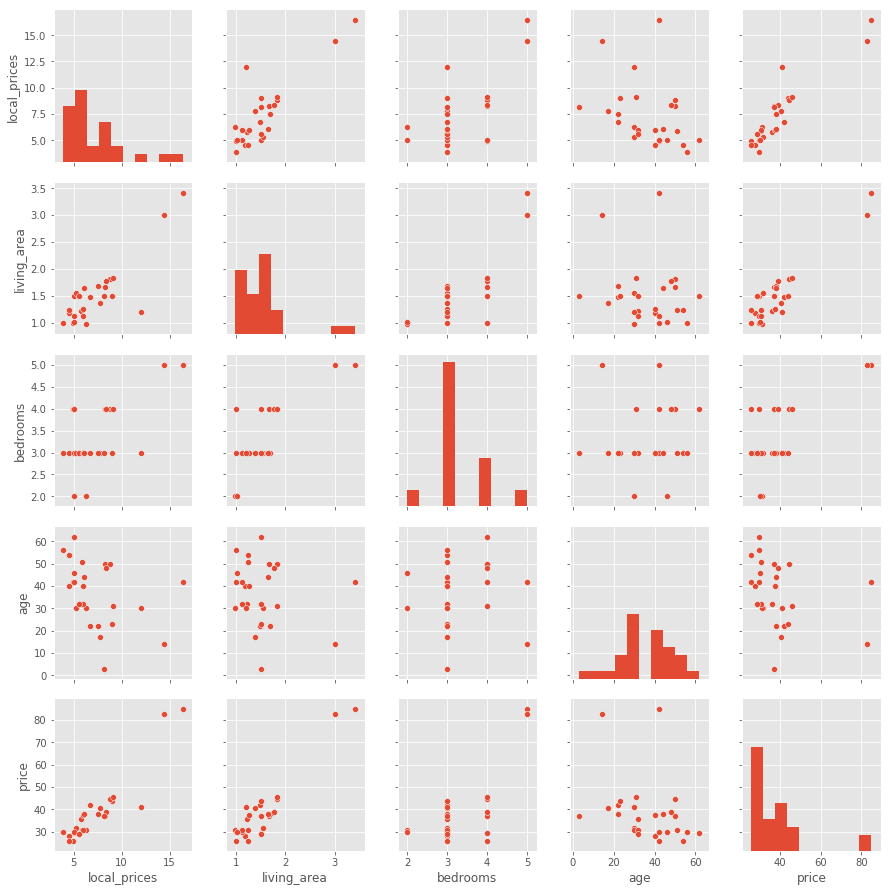

In [32]:
plt.figure(figsize=(10,8))

sns.pairplot(df[['local_prices', 'living_area', 'bedrooms', 'age', 'price']]);
plt.show()

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

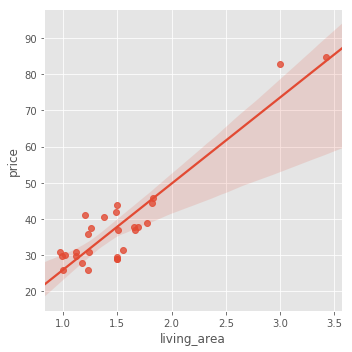

In [33]:
sns.lmplot(data=df, x='living_area', y='price');

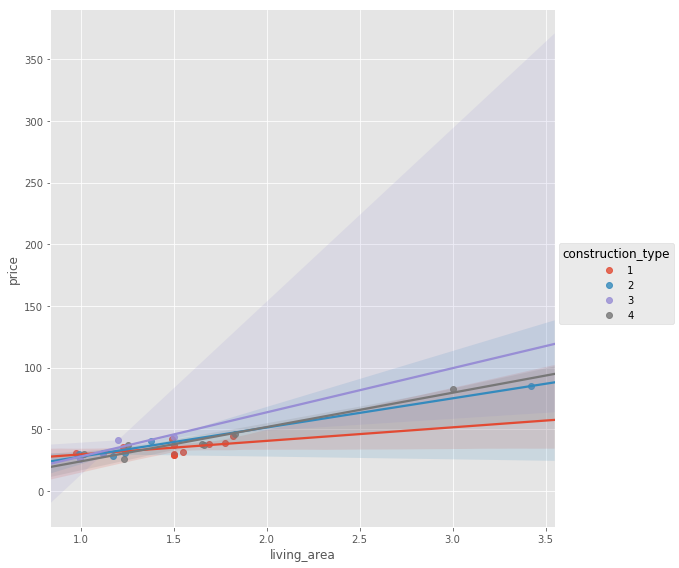

In [34]:
sns.lmplot(data=df, x='living_area', y='price', hue='construction_type', size=8);

## Categorical data

https://seaborn.pydata.org/tutorial/categorical.html

In [35]:
titanic = pd.read_csv('data/titanic.csv', index_col=0)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Swarm plot

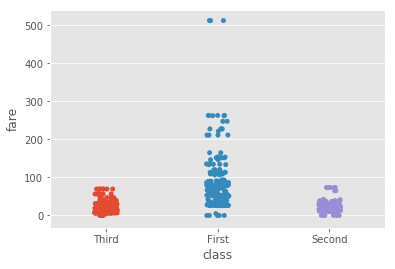

In [36]:
sns.stripplot(data=titanic, x='class',y='fare', jitter=True);

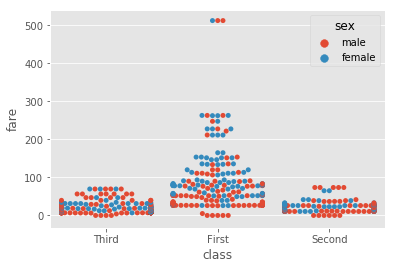

In [37]:
sns.swarmplot(data=titanic, x='class',y='fare', hue='sex');

### Boxplot

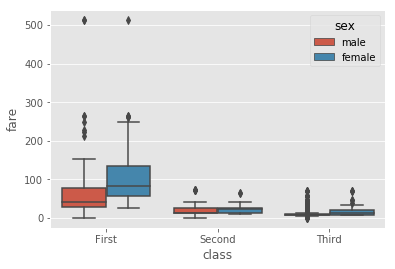

In [38]:
sns.boxplot(data=titanic, x='class',y='fare', hue='sex', order=['First', 'Second', 'Third']);

### Barplot / countplot

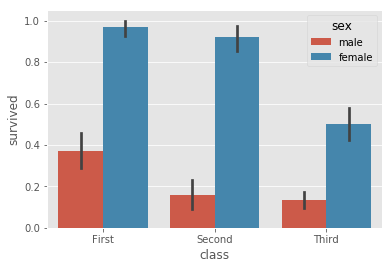

In [39]:
sns.barplot(x="class", y="survived", hue="sex", data=titanic, order=['First', 'Second', 'Third']);

### Pointplot

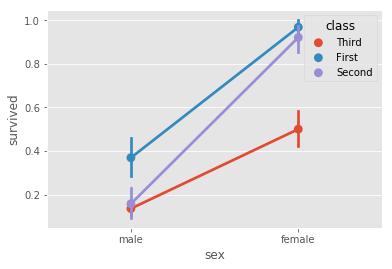

In [40]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic, );

## Other types

### Heatmap

In [41]:
mean_prices = df.groupby(['bathrooms', 'bedrooms'])['price'].mean()
mean_prices


bathrooms  bedrooms
1.0        2           30.500000
           3           32.223077
           4           27.700000
1.5        3           39.840000
           4           41.525000
2.5        5           83.900000
Name: price, dtype: float64

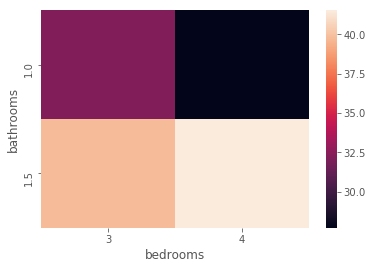

In [42]:
sns.heatmap(mean_prices[:-1][1:].unstack());

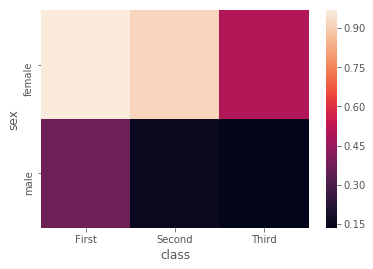

In [43]:
survival = titanic.groupby(['sex', 'class'])['survived'].mean()
sns.heatmap(survival.unstack());

### Clustermap

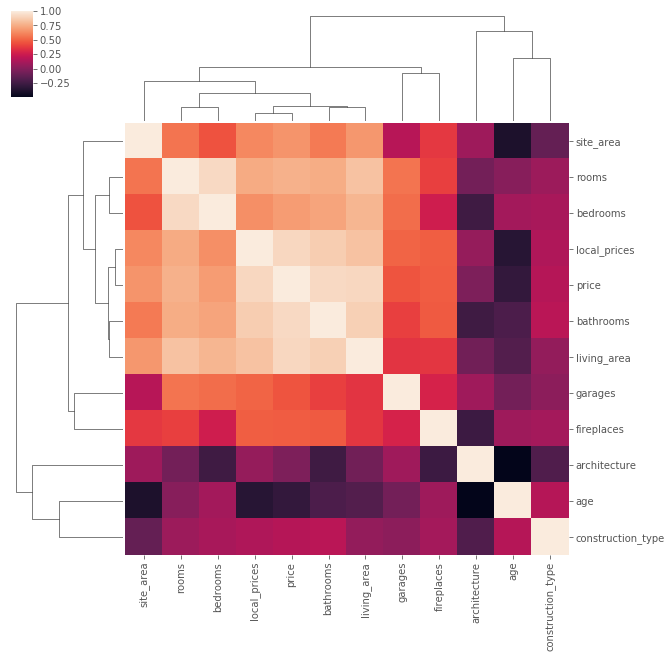

In [44]:
sns.clustermap(df.corr());

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

In [45]:
from bokeh import plotting 

n = 100
X = np.linspace(0,10, n)
Y = np.sin(X)

plotting.output_notebook()
figure = plotting.figure(title='Line example', x_axis_label='x', y_axis_label='y')
figure.line(X, Y, legend='Sine', line_width=4)
plotting.show(figure)

Loading BokehJS ...

### Scatterplot

In [46]:
X, Y = generate_points(50, .7,scale=50, n=100)

figure = plotting.figure()
figure.circle(X,Y)
plotting.show(figure)

### Controlling line/marker properties

https://bokeh.pydata.org/en/latest/docs/reference/palettes.html

In [47]:
from bokeh import palettes

X, Y = generate_points(50, .7,scale=50, n=100)
palette = palettes.Category20[20]
sizes = np.random.random(100) * 20

figure = plotting.figure()
figure.circle(X,Y, size=sizes, line_color=palette[0], fill_color=palette[1])
plotting.show(figure)

#### Selected and non-selected glyphs

In [48]:
from bokeh import palettes

X, Y = generate_points(50, .7,scale=50, n=100)
palette = palettes.Category20[20]
sizes = np.random.random(100) * 20

figure = plotting.figure(tools='tap')
renderer = figure.circle(X,Y, size=sizes, 
                         line_color=palette[0], fill_color=palette[1],
                         # set visual properties for selected glyphs
                         selection_color=palette[6],
                         # set visual properties for non-selected glyphs
                         nonselection_fill_alpha=0.2,
                         nonselection_fill_color=palette[7]
                        
                        )


plotting.show(figure)

#### Tools

https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html

In [49]:
from bokeh import palettes
from bokeh import models

X, Y = generate_points(50, .7,scale=50, n=100)
palette = palettes.Category20[20]
sizes = np.random.random(100) * 20

figure = plotting.figure(tools='tap')
renderer = figure.circle(X,Y, size=sizes, 
                         line_color=palette[0], fill_color=palette[1],
                         # set visual properties for selected glyphs
                         selection_color=palette[6],
                         # set visual properties for non-selected glyphs
                         nonselection_fill_alpha=0.2,
                         nonselection_fill_color=palette[7])

figure.add_tools(models.LassoSelectTool())
figure.add_tools(models.WheelZoomTool())
figure.add_tools(models.ResetTool())

hovertool = models.HoverTool(tooltips=[('X','$x'),('Y', '$y')])

figure.add_tools(hovertool)


plotting.show(figure)

#### Exercise

Perform a linear regression on a set of data generated with `generate_points()`. Plot both the points and the line of best fit with Bokeh.

#### Bonus 

Plot the residuals on the same graph.

**Hint**: check out [this page](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html) in the Bokeh documentation, it might prove useful.

## Bokeh Server

Bokeh's architecture lends itself very naturally to a remote server-client use case.

https://bokeh.pydata.org/en/latest/docs/user_guide/server.html


In [50]:
from IPython import display

display.IFrame('https://demo.bokehplots.com/apps/sliders', 1024, 800)

In [51]:
display.IFrame('https://demo.bokehplots.com/apps/crossfilter', 1024, 800)

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

In [52]:
import plotly as py
from plotly import graph_objs as go

py.offline.init_notebook_mode(connected=True)

In [53]:
X, Y = generate_points(20, 0.3)
Y = Y ** 2

data = go.Scatter(x=X,y=Y, mode='markers')
py.offline.iplot({'data': [data]})

In [54]:
sorted_X, sorted_Y = zip(*sorted(zip(X, Y)))
Y_1 = np.array(sorted_Y) + 3e5
Y_2 = np.array(sorted_Y) - 3e5

trace0 = go.Scatter(
    x=sorted_X,
    y=sorted_Y,
    mode='markers',
    name='markers'
)

trace1 = go.Scatter(
    x=sorted_X,
    y=Y_1,
    mode='lines',
    name='lines'
)

trace2 = go.Scatter(
    x=sorted_X,
    y=Y_2,
    mode='lines+markers',
    name='lines+markers'
)

data = [trace0, trace1, trace2]

py.offline.iplot(data)


In [55]:
n = 500

trace0 = go.Scatter(
    x = np.random.randn(n),
    y = np.random.randn(n)+2,
    name = 'Above',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = np.random.randn(n),
    y = np.random.randn(n)-2,
    name = 'Below',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Styled Scatter',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.offline.iplot(fig, filename='styled-scatter')


### Bar charts

In [56]:
data = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]

py.offline.iplot(data, filename='basic-bar')

### Boxplot

In [57]:
first = titanic[titanic['class'] == 'First']['fare']
second = titanic[titanic['class'] == 'Second']['fare']
third = titanic[titanic['class'] == 'Third']['fare']

data = [
    {'y' : first,
     'name' : 'First Class',
     'type' : 'box'      
    },
    {'y' : second,
     'name' : 'Second Class',
     'type' : 'box'      
    },
    {'y' : third,
     'name' : 'Third Class',
     'type' : 'box'      
    }]

layout = go.Layout(title='Fare Spread by class in Titanic', 
                   yaxis = {'title' : 'Fare in USD'})

figure = go.Figure(data=data, layout=layout)
py.offline.iplot(figure)

## Dash

"Shiny for Python" 


In [58]:
display.IFrame('https://plot.ly/dash/gallery/drug-explorer/', 800, 600)

https://plot.ly/dash/getting-started-part-2

# See Also: Vega

http://vega.github.io/

# Facets

[Facets](https://pair-code.github.io/facets/) is a research project by the [PAIR](https://ai.google/pair) research group at google. This is the same people that released [deeplearning.js](https://deeplearnjs.org/) recently.

Two components: Facets Overview and Facets Dive

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)